In [141]:
!pip install fcapy
!pip install frozendict
!pip install ipynb
!pip install sparselinear
!pip install bitsets
!pip install bitarray
import torch
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git

10944.71s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
zsh:1: command not found: pip
10949.95s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
zsh:1: command not found: pip
10955.17s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
zsh:1: command not found: pip
10960.39s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
zsh:1: command not found: pip
10965.61s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
zsh:1: command not found: pip
10970.83s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
zsh:1: command not found: pip
10976.05s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
zsh:1: command not found: pip
10981.27s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
zsh:1: command not fou

In [142]:
import pandas as pd
import numpy as np

In [143]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [144]:
from fcapy.context import FormalContext
from fcapy.lattice import ConceptLattice

from fcapy.visualizer import LineVizNx
import matplotlib.pyplot as plt

plt.rcParams['figure.facecolor'] = (1,1,1,1)

## Data uploading

In [145]:
data_filled =  pd.read_csv('Breast_cancer_w_bin.csv')

,id,diagnosis,texture_mean <= 19.47,area_mean <= 696.25,concavity_mean <= 0.093,concavity_worst <= 0.26,area_se <= 31.285
0,h0,True,True,False,False,False,False
1,h1,True,True,False,True,True,False
2,h2,True,False,False,False,False,False
3,h3,True,False,True,False,False,True
4,h4,True,True,False,False,False,False
...,...,...,...,...,...,...,...
564,h564,True,False,False,False,False,False
565,h565,True,False,False,False,False,False
566,h566,True,False,False,True,False,False
567,h567,True,False,False,False,False,False


In [147]:
data_filled['sample_id'] = np.arange(0, data_filled.shape[0], 1).astype(str)
data_filled['id'] = data_filled['sample_id'].apply(lambda x: 'h' + x)
data_filled.drop(columns=['sample_id'], inplace=True)
data_filled = data_filled.set_index('id')
data_filled

,diagnosis,texture_mean <= 19.47,area_mean <= 696.25,concavity_mean <= 0.093,concavity_worst <= 0.26,area_se <= 31.285
id,,,,,,
h0,True,True,False,False,False,False
h1,True,True,False,True,True,False
h2,True,False,False,False,False,False
h3,True,False,True,False,False,True
h4,True,True,False,False,False,False
...,...,...,...,...,...,...
h564,True,False,False,False,False,False
h565,True,False,False,False,False,False
h566,True,False,False,True,False,False


In [148]:
y = data_filled['diagnosis']
data_filled.drop(['diagnosis'], axis=1, inplace=True)

# Experiments 

## DATA SPLITTING

In [313]:
from sklearn.model_selection import train_test_split
X_train_, X_rem, y_train_, y_rem = train_test_split(data_filled,y, train_size=0.6, random_state = 49)
X_valid, X_test_, y_valid, y_test_ = train_test_split(X_rem,y_rem, test_size=0.5, random_state = 49)

In [314]:
y.value_counts()

diagnosis
False    357
True     212
Name: count, dtype: int64

In [315]:
X_train_.shape

(341, 5)

In [316]:
y_train_.value_counts()

diagnosis
False    214
True     127
Name: count, dtype: int64

In [317]:
X_valid.shape

(114, 5)

In [318]:
y_valid.value_counts()

diagnosis
False    67
True     47
Name: count, dtype: int64

In [319]:
X_test_.shape

(114, 5)

In [320]:
y_test_.value_counts()

diagnosis
False    76
True     38
Name: count, dtype: int64

## FCA PART

### Creating a formal context

In [321]:
K_train_ = FormalContext.from_pandas(X_train_)
K_train_

FormalContext (341 objects, 5 attributes, 1051 connections)
    |texture_mean <= 19.47|area_mean <= 696.25|concavity_mean <= 0.093|concavity_worst <= 0.26|area_se <= 31.285|
h210|                     |                   |                       |                       |                 |
h353|                     |                   |                       |                       |                 |
h23 |                     |                   |                       |                       |                 |
h541|                     |                  X|                       |                       |                X|
h318|                    X|                  X|                       |                       |                X|
h324|                    X|                  X|                      X|                      X|                X|
h508|                    X|                   |                      X|                      X|                X|
h21 |                    X| 

### Creating a concept lattice (algorithm - Sofia, monotone)

In [322]:
L_ = ConceptLattice.from_context(K_train_, algo='Sofia', is_monotone= True)
len(L_)

29

In [323]:
for c in L_:
    print(c.intent)

()
('texture_mean <= 19.47',)
('concavity_worst <= 0.26',)
('area_se <= 31.285',)
('concavity_mean <= 0.093',)
('concavity_mean <= 0.093', 'concavity_worst <= 0.26')
('area_mean <= 696.25',)
('concavity_mean <= 0.093', 'area_se <= 31.285')
('area_mean <= 696.25', 'area_se <= 31.285')
('concavity_worst <= 0.26', 'area_se <= 31.285')
('texture_mean <= 19.47', 'concavity_worst <= 0.26')
('texture_mean <= 19.47', 'area_se <= 31.285')
('concavity_mean <= 0.093', 'concavity_worst <= 0.26', 'area_se <= 31.285')
('texture_mean <= 19.47', 'concavity_mean <= 0.093')
('area_mean <= 696.25', 'concavity_mean <= 0.093')
('area_mean <= 696.25', 'concavity_mean <= 0.093', 'area_se <= 31.285')
('area_mean <= 696.25', 'concavity_worst <= 0.26')
('texture_mean <= 19.47', 'concavity_mean <= 0.093', 'concavity_worst <= 0.26')
('area_mean <= 696.25', 'concavity_worst <= 0.26', 'area_se <= 31.285')
('area_mean <= 696.25', 'concavity_mean <= 0.093', 'concavity_worst <= 0.26')
('area_mean <= 696.25', 'concavit

## ALL CONCEPTS EXPERIMENTS

### Getting concept indices

In [324]:
L_ind = []
for c in L_:
    L_ind.append(L_.index(c))
#L_ind = L_ind[:3]
print(L_ind)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]


### NN part: training/testing

In [325]:
import neural_lib58 as nl
import matplotlib as plt

f1_list = [] # list for test scores
f1_list_train = [] # list for train scores
epochs_list = [] # list for epochs
cn = nl.ConceptNetwork.from_lattice(L_, L_ind, sorted(set(y_train_))) # creating a NN
#cn_ = nl.ConceptNetwork.from_lattice(L_, L_indices_, sorted(set(y_train_)))
for i in range(200): # 10000 epochs
    k = 50
    print('Epoch ', k*(i+1))
    epochs_list.append(k*(i+1))
    if i == 0: # NN training
        cn.fit(X_train_, y_train_, k)
    else:
        cn.fit_2(X_train_, y_train_, k)
    pred_all = cn.predict(X_test_) # prediction on train
    pred_train_all = cn.predict(X_train_) # prediction on test
    pred = pred_all[1] 
    pred_train = pred_train_all[1]

    print('score train:', f1_score(y_train_, pred_train)) # F1-score calculating (train)
    print('score test:', f1_score(y_test_, pred)) # F1-score calculating (test)
    f1_list.append(f1_score(y_test_, pred))
    f1_list_train.append(f1_score(y_train_, pred_train))
print(max(f1_list))

Epoch  50
score train: 0.0
score test: 0.0
Epoch  100
score train: 0.0
score test: 0.0
Epoch  150
score train: 0.0
score test: 0.0
Epoch  200
score train: 0.0
score test: 0.0
Epoch  250
score train: 0.0
score test: 0.0
Epoch  300
score train: 0.0
score test: 0.0
Epoch  350
score train: 0.0
score test: 0.0
Epoch  400
score train: 0.0
score test: 0.0
Epoch  450
score train: 0.0
score test: 0.0
Epoch  500
score train: 0.0
score test: 0.0
Epoch  550
score train: 0.0
score test: 0.0
Epoch  600
score train: 0.0
score test: 0.0
Epoch  650
score train: 0.0
score test: 0.0
Epoch  700
score train: 0.0
score test: 0.0
Epoch  750
score train: 0.0
score test: 0.0
Epoch  800
score train: 0.0
score test: 0.0
Epoch  850
score train: 0.0
score test: 0.0
Epoch  900
score train: 0.0
score test: 0.0
Epoch  950
score train: 0.0
score test: 0.0
Epoch  1000
score train: 0.0
score test: 0.0
Epoch  1050
score train: 0.0
score test: 0.0
Epoch  1100
score train: 0.0
score test: 0.0
Epoch  1150
score train: 0.0
s

### Plotting

([<matplotlib.axis.YTick at 0x29a853140>,
 [Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.15000000000000002, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.30000000000000004, '0.30'),
  Text(0, 0.35000000000000003, '0.35'),
  Text(0, 0.4, '0.40'),
  Text(0, 0.45, '0.45'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.55, '0.55'),
  Text(0, 0.6000000000000001, '0.60'),
  Text(0, 0.65, '0.65'),
  Text(0, 0.7000000000000001, '0.70'),
  Text(0, 0.75, '0.75'),
  Text(0, 0.8, '0.80'),
  Text(0, 0.8500000000000001, '0.85'),
  Text(0, 0.9, '0.90'),
  Text(0, 0.9500000000000001, '0.95')])

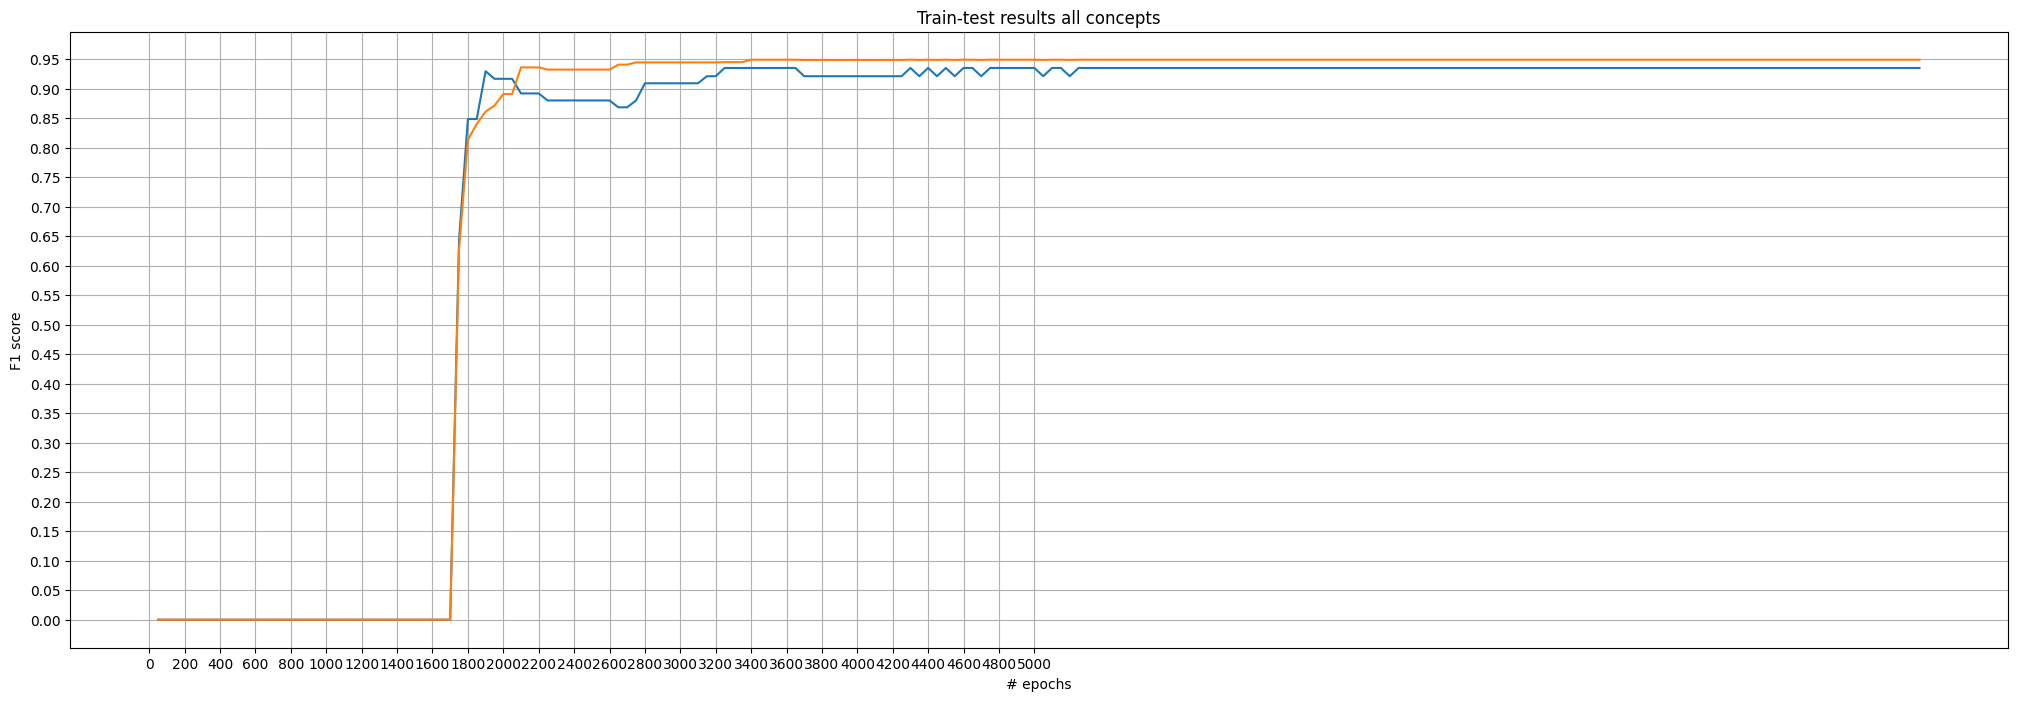

In [326]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(25,8))
plt.plot(epochs_list,f1_list )
plt.plot(epochs_list,f1_list_train)

plt.title('Train-test results all concepts')
plt.xlabel("# epochs")
plt.ylabel("F1 score")
plt.grid()
plt.xticks(np.arange(0, 5200, 200))
plt.yticks(np.arange(0, 1, 0.05))

###  Fitted NN visualization

In [327]:
vis = LineVizNx(node_label_font_size=14, node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n')

In [328]:
edge_weights = cn.edge_weights_from_network()

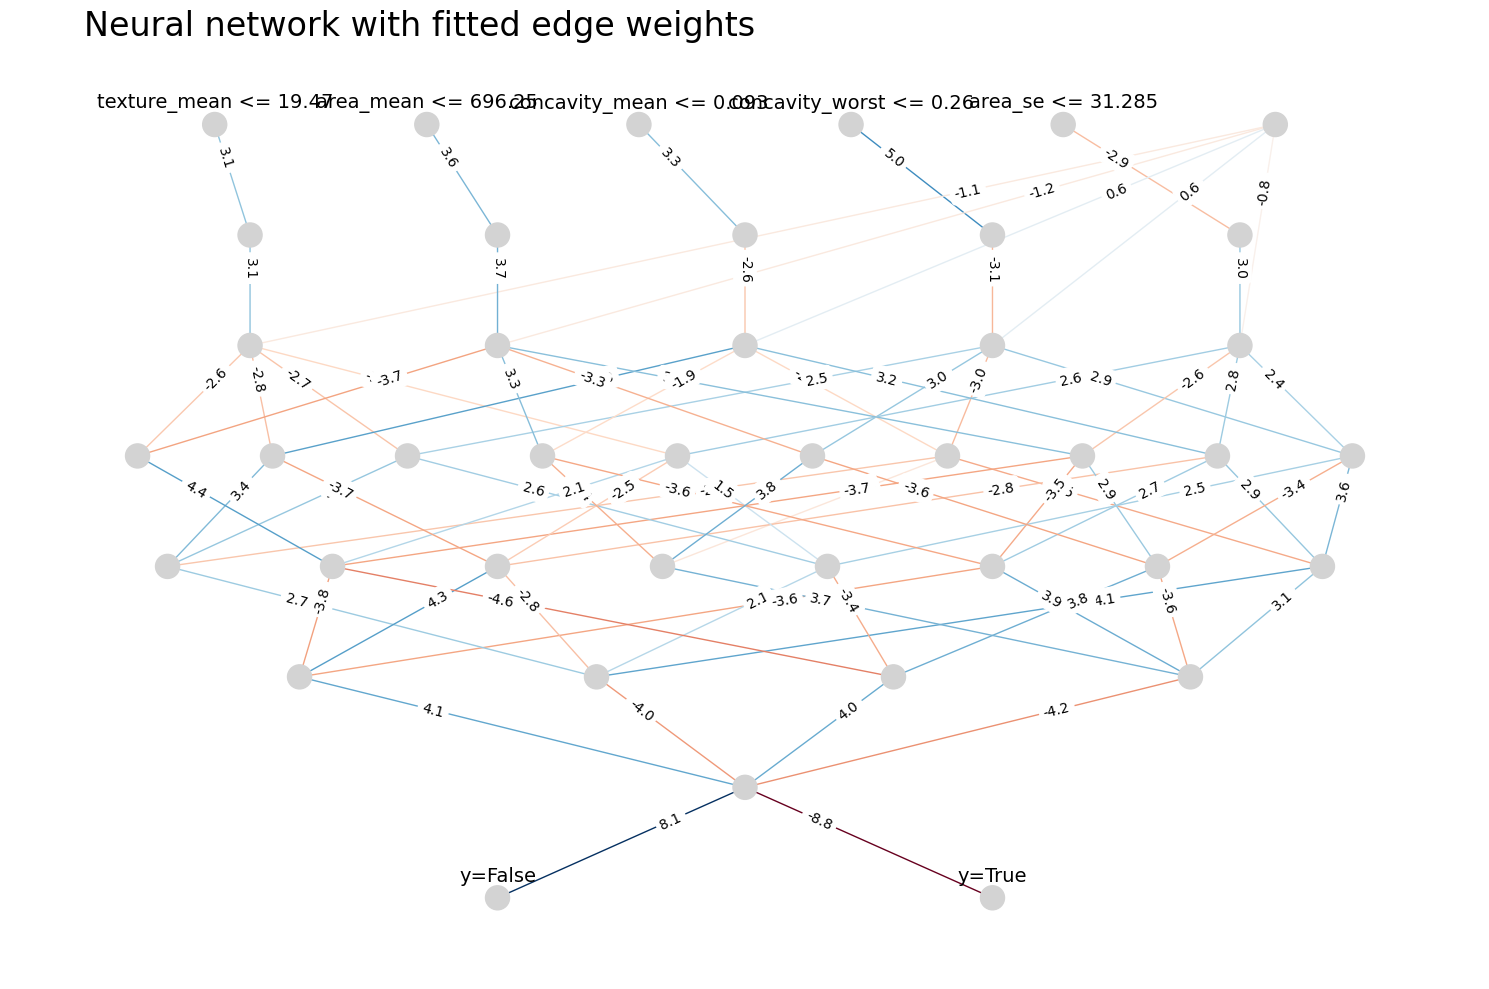

In [329]:
import networkx as nx

fig, ax = plt.subplots(figsize=(15,10))

vis.draw_poset(
    cn.poset, ax=ax, 
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    edge_color=[edge_weights[edge] for edge in cn.poset.to_networkx().edges],
    edge_cmap=plt.cm.RdBu,
)
nx.draw_networkx_edge_labels(cn.poset.to_networkx(), vis.mover.pos, {k: f"{v:.1f}" for k,v in edge_weights.items()}, label_pos=0.7)

plt.title('Neural network with fitted edge weights', size=24, x=0.05, loc='left')
plt.tight_layout()
plt.subplots_adjust()
plt.savefig('fitted_network.png')
plt.show()

## End of experiments with all concepts

### Purity function

In [330]:
def purity(concept, y_train):
    count_pos = 0 # count the number of positive objects in concept
    count_neg = 0 # count the number of negative objects in concept
    positive = True 
    for obj in concept.extent:
        if y_train[obj] == True:
            count_pos+= 1
        else:
            count_neg+= 1
            
    if count_pos < count_neg: # #positive < #negative => more negative objects in the concept
        positive = False
    if len(concept.extent)!= 0:
        #  => calculating purity = the maximum( #pos objects, #neg objects)/ #all objects in this concept
        return count_pos, count_neg, max(count_pos, count_neg)/ len(concept.extent), positive (#pos, #neg, purity)
    else:
        return 0,0, 0, False 

### Object coverage function

In [331]:
def obj_coverage(concept, y_train): # #objects in concept / # all objects in dataset
    return round(len(concept.extent)/len(y_train),2)

### Concept properties calculation

In [332]:
L_prop = []
conc_prop = []
pos = 0 
neg = 0
pur  = 0
pur_list = []
cover = 0
for c in L_:
    conc_prop.append(c) # 0-s element is concepts itself
    pos, neg, pur, positive = purity(c, y_train_)
    pur_list.append(pos)
    pur_list.append(neg)
    pur_list.append(pur)
    pur_list.append(positive)
    cover = obj_coverage(c, y_train_)
    conc_prop.append(pur_list) #  1-s element is purity itself
    conc_prop.append(cover)  #  2-s element is coverage itself
    L_prop.append(conc_prop)
    conc_prop = []
    pur_list = []
    pur = 0
    cover = 0 

In [333]:
pur_list = []
cover_list = []
for c in L_prop:
    pur_list.append(c[1][2]) # just purities
    cover_list.append(c[2])  #just object coverages

In [334]:
print('min-max purity:', min(pur_list), max(pur_list)) # this particular train-test-valid
print('min-max coverage:', min(cover_list), max(cover_list)) # (object coverage)

min-max purity: 0 0.9198113207547169
min-max coverage: 0.0 0.83


In [335]:
for c in L_prop:
    print(round(c[1][2],2),round(c[2],2)) # for each concept print its purity and object coverage

0 0.0
0.83 0.54
0.91 0.59
0.92 0.62
0.91 0.64
0.89 0.67
0.88 0.7
0.87 0.72
0.87 0.72
0.87 0.72
0.82 0.73
0.82 0.73
0.85 0.74
0.82 0.75
0.84 0.75
0.84 0.75
0.83 0.75
0.8 0.76
0.82 0.76
0.82 0.77
0.81 0.77
0.8 0.79
0.8 0.79
0.8 0.79
0.79 0.79
0.78 0.8
0.77 0.82
0.76 0.82
0.76 0.83


In [ ]:
### for all purity intervals calculating which concepts belong to them

In [336]:
count_pur_one_sided = {} # dictionary of number of concepts in  the purity interval [key,) (from this value and above)
pur_conc_one_sided = {} # dictionary of concept lists in  the purity interval [key, )
pur_conc_all_one_sided ={} # dictionary of all concepts (with all properties) belonging to particular intervals
cov_conc_one_sided = {} # dictionart of all concepts' coverages belonging to particular intervals

for i in np.arange(0, 1, 0.05):
    count_pur_one_sided[round(i,2)] = 0
    pur_conc_one_sided[round(i,2)] = []
    pur_conc_all_one_sided[round(i,2)] = []
    cov_conc_one_sided[round(i,2)] = []
    
   # print(round(i,2))
    for c in L_prop:
        if (round(c[1][2],2)>= round(i,2)): # purity above this threshold 
            print( round(i,2))
            print(c[1][2])
            count_pur_one_sided[round(i,2)]+=1 # how many in this interval
            pur_conc_one_sided[round(i,2)].append(c[0]) # what concepts are in this interval
            pur_conc_all_one_sided[round(i,2)].append(c) # add everything connected to this concepts
            cov_conc_one_sided[round(i,2)].append(c[2]) # add object coverage connected to this concepts
            
# print(count_pur)
# check_1 = 0
# check_2 = 0
# for key in count_pur:
#     check_1+=count_pur[key]
#     check_2+=len(pur_conc[key])
# print(check_1, check_2)

0.0
0
0.0
0.827027027027027
0.0
0.91
0.0
0.9198113207547169
0.0
0.9124423963133641
0.0
0.8854625550660793
0.0
0.8818565400843882
0.0
0.8729508196721312
0.0
0.8734693877551021
0.0
0.8699186991869918
0.0
0.8152610441767069
0.0
0.824
0.0
0.8492063492063492
0.0
0.8156862745098039
0.0
0.8392156862745098
0.0
0.8359375
0.0
0.8287937743190662
0.0
0.8
0.0
0.823076923076923
0.0
0.816793893129771
0.0
0.8136882129277566
0.0
0.7955390334572491
0.0
0.7955390334572491
0.0
0.7955390334572491
0.0
0.7925925925925926
0.0
0.781021897810219
0.0
0.7697841726618705
0.0
0.7615658362989324
0.0
0.7561837455830389
0.05
0.827027027027027
0.05
0.91
0.05
0.9198113207547169
0.05
0.9124423963133641
0.05
0.8854625550660793
0.05
0.8818565400843882
0.05
0.8729508196721312
0.05
0.8734693877551021
0.05
0.8699186991869918
0.05
0.8152610441767069
0.05
0.824
0.05
0.8492063492063492
0.05
0.8156862745098039
0.05
0.8392156862745098
0.05
0.8359375
0.05
0.8287937743190662
0.05
0.8
0.05
0.823076923076923
0.05
0.816793893129771
0.0

In [1]:
# #concepts within each interval 

In [357]:
print(count_pur_one_sided)


{0.0: 29, 0.05: 28, 0.1: 28, 0.15: 28, 0.2: 28, 0.25: 28, 0.3: 28, 0.35: 28, 0.4: 28, 0.45: 28, 0.5: 28, 0.55: 28, 0.6: 28, 0.65: 28, 0.7: 28, 0.75: 28, 0.8: 23, 0.85: 9, 0.9: 3, 0.95: 0}


In [358]:
for key in pur_conc_all_one_sided:
    print(key, count_pur_one_sided[key]) # number of concept with purity above this 
    if count_pur_one_sided[key] == 0:
        print('0')
    else:
        print(max(cov_conc_one_sided[key]))

0.0 29
0.83
0.05 28
0.83
0.1 28
0.83
0.15 28
0.83
0.2 28
0.83
0.25 28
0.83
0.3 28
0.83
0.35 28
0.83
0.4 28
0.83
0.45 28
0.83
0.5 28
0.83
0.55 28
0.83
0.6 28
0.83
0.65 28
0.83
0.7 28
0.83
0.75 28
0.83
0.8 23
0.79
0.85 9
0.74
0.9 3
0.64
0.95 0
0


In [359]:
# for c in pur_conc_one_sided[0.65]:
#     print(L_.index(c))

### Concept analysis

In [360]:
pur_09 = 0.9

In [361]:
table_bcw_09 = pd.DataFrame(columns = ['intent',
                                 'purity', 
                                 'object coverage',
                                 '# positive objects',
                                 '# negative objects',
                                 '# more positive or negative?'

                                ])



print('purity >= 0.9')
i = 0
for conc in pur_conc_all_one_sided[pur_09]:
    print('positive objects', conc[1][0])
    print('negative objects', conc[1][1])
    print('purity', round(conc[1][2],2))
    table_bcw_09.loc[i] = [conc[0].intent, round(conc[1][2],2), conc[2],  conc[1][0], conc[1][1], conc[1][3]]
    i+=1

table_bcw_09.to_csv('table_bcw_09.csv')
table_bcw_09

purity >= 0.9
positive objects 18
negative objects 182
purity 0.91
positive objects 17
negative objects 195
purity 0.92
positive objects 19
negative objects 198
purity 0.91


,intent,purity,object coverage,# positive objects,# negative objects,# more positive or negative?
0,"(concavity_worst <= 0.26,)",0.91,0.59,18,182,False
1,"(area_se <= 31.285,)",0.92,0.62,17,195,False
2,"(concavity_mean <= 0.093,)",0.91,0.64,19,198,False


In [385]:
pur_085 = 0.85
table_bcw_085 = pd.DataFrame(columns = ['intent',
                                 'purity', 
                                 'object coverage',
                                 '# positive objects',
                                 '# negative objects',
                                 '# more positive or negative?'

                                ])



print('purity >= 0.85')
i = 0
for conc in pur_conc_all_one_sided[pur_085]:
    print('positive objects', conc[1][0])
    print('negative objects', conc[1][1])
    print('purity', round(conc[1][2],2))
    table_bcw_085.loc[i] = [conc[0].intent, round(conc[1][2],2), conc[2],  conc[1][0], conc[1][1], conc[1][3]]
    i+=1

table_bcw_085.to_csv('table_bcw_085.csv')
table_bcw_085

purity >= 0.85
positive objects 18
negative objects 182
purity 0.91
positive objects 17
negative objects 195
purity 0.92
positive objects 19
negative objects 198
purity 0.91
positive objects 26
negative objects 201
purity 0.89
positive objects 28
negative objects 209
purity 0.88
positive objects 31
negative objects 213
purity 0.87
positive objects 31
negative objects 214
purity 0.87
positive objects 32
negative objects 214
purity 0.87
positive objects 38
negative objects 214
purity 0.85


,intent,purity,object coverage,# positive objects,# negative objects,# more positive or negative?
0,"(concavity_worst <= 0.26,)",0.91,0.59,18,182,False
1,"(area_se <= 31.285,)",0.92,0.62,17,195,False
2,"(concavity_mean <= 0.093,)",0.91,0.64,19,198,False
3,"(concavity_mean <= 0.093, concavity_worst <= 0...",0.89,0.67,26,201,False
4,"(area_mean <= 696.25,)",0.88,0.70,28,209,False
5,"(concavity_mean <= 0.093, area_se <= 31.285)",0.87,0.72,31,213,False
6,"(area_mean <= 696.25, area_se <= 31.285)",0.87,0.72,31,214,False
7,"(concavity_worst <= 0.26, area_se <= 31.285)",0.87,0.72,32,214,False
8,"(concavity_mean <= 0.093, concavity_worst <= 0...",0.85,0.74,38,214,False


## 2 concepts

### 1. Check for purity above 0.9

In [386]:
pur_09 = 0.9
L_ind_09 = []
for conc in pur_conc_all_one_sided[pur_09]:
    L_ind_09.append(L_.index(conc[0]))
print(L_ind_09)

[2, 3, 4]


In [387]:
len(L_ind_09)

3

### 2. Check for purity above 0.85

In [388]:
pur_085 = 0.85
L_ind_085 = []
for conc in pur_conc_all_one_sided[pur_085]:
    L_ind_085.append(L_.index(conc[0]))
print(L_ind_085)

[2, 3, 4, 5, 6, 7, 8, 9, 12]


### 3. Let's try all concepts from the interval >=0.9 

In [389]:
union_coverage_obj = set((pur_conc_all_one_sided[pur_09][0][0].extent))
for conc in pur_conc_all_one_sided[pur_09]:
    print(conc[2])
    union_coverage_obj = union_coverage_obj.union(set(conc[0].extent))
print(round(len(union_coverage_obj)/len(y_train_),2))

0.59
0.62
0.64
0.74


In [379]:
import neural_lib58 as nl
import matplotlib as plt

f1_list = []
f1_list_train = []
f1_list_valid = []
epochs_list = []

res_09_all_bcw = pd.DataFrame(columns = ['epoch', 'F1_score_train', 'F1_score_val', 'F1_score_test'])

cn = nl.ConceptNetwork.from_lattice(L_, L_ind_09, sorted(set(y_train_)))
#cn_ = nl.ConceptNetwork.from_lattice(L_, L_indices_, sorted(set(y_train_)))
for i in range(200):
    k = 50
    print('Epoch ', k*(i+1))
    epochs_list.append(k*(i+1))
    if i == 0:
        cn.fit(X_train_, y_train_, k)
    else:
        cn.fit_2(X_train_, y_train_, k)
    pred_all = cn.predict(X_test_)
    pred_train_all = cn.predict(X_train_)
    pred_val_all = cn.predict(X_valid)
    pred_valid = pred_val_all[1]
    pred = pred_all[1]
    pred_train = pred_train_all[1]
    

    print('score train:', f1_score(y_train_, pred_train))
    print('score val:', f1_score(y_valid, pred_valid))
    print('score test:', f1_score(y_test_, pred))
    f1_list.append(f1_score(y_test_, pred))
    f1_list_train.append(f1_score(y_train_, pred_train))
    f1_list_valid.append(f1_score(y_valid, pred_valid))
    res_09_all_bcw.loc[len(res_09_all_bcw)] = [k*(i+1), f1_score(y_train_, pred_train), f1_score(y_valid, pred_valid), f1_score(y_test_, pred)]


Epoch  50
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  100
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  150
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  200
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  250
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  300
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  350
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  400
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  450
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  500
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  550
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  600
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  650
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  700
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  750
score train: 0.7609756097560976
score val: 0.7123287671232876
score test: 0.7936507936507936
Epoch  800
score train: 0.7609756097560976
score val: 0.712328767123287

In [354]:
res_09_all_bcw.to_csv('breast_cancer_w_09_all.csv')

([<matplotlib.axis.YTick at 0x141372630>,
 [Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.15000000000000002, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.30000000000000004, '0.30'),
  Text(0, 0.35000000000000003, '0.35'),
  Text(0, 0.4, '0.40'),
  Text(0, 0.45, '0.45'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.55, '0.55'),
  Text(0, 0.6000000000000001, '0.60'),
  Text(0, 0.65, '0.65'),
  Text(0, 0.7000000000000001, '0.70'),
  Text(0, 0.75, '0.75'),
  Text(0, 0.8, '0.80'),
  Text(0, 0.8500000000000001, '0.85'),
  Text(0, 0.9, '0.90'),
  Text(0, 0.9500000000000001, '0.95'),
  Text(0, 1.0, '1.00')])

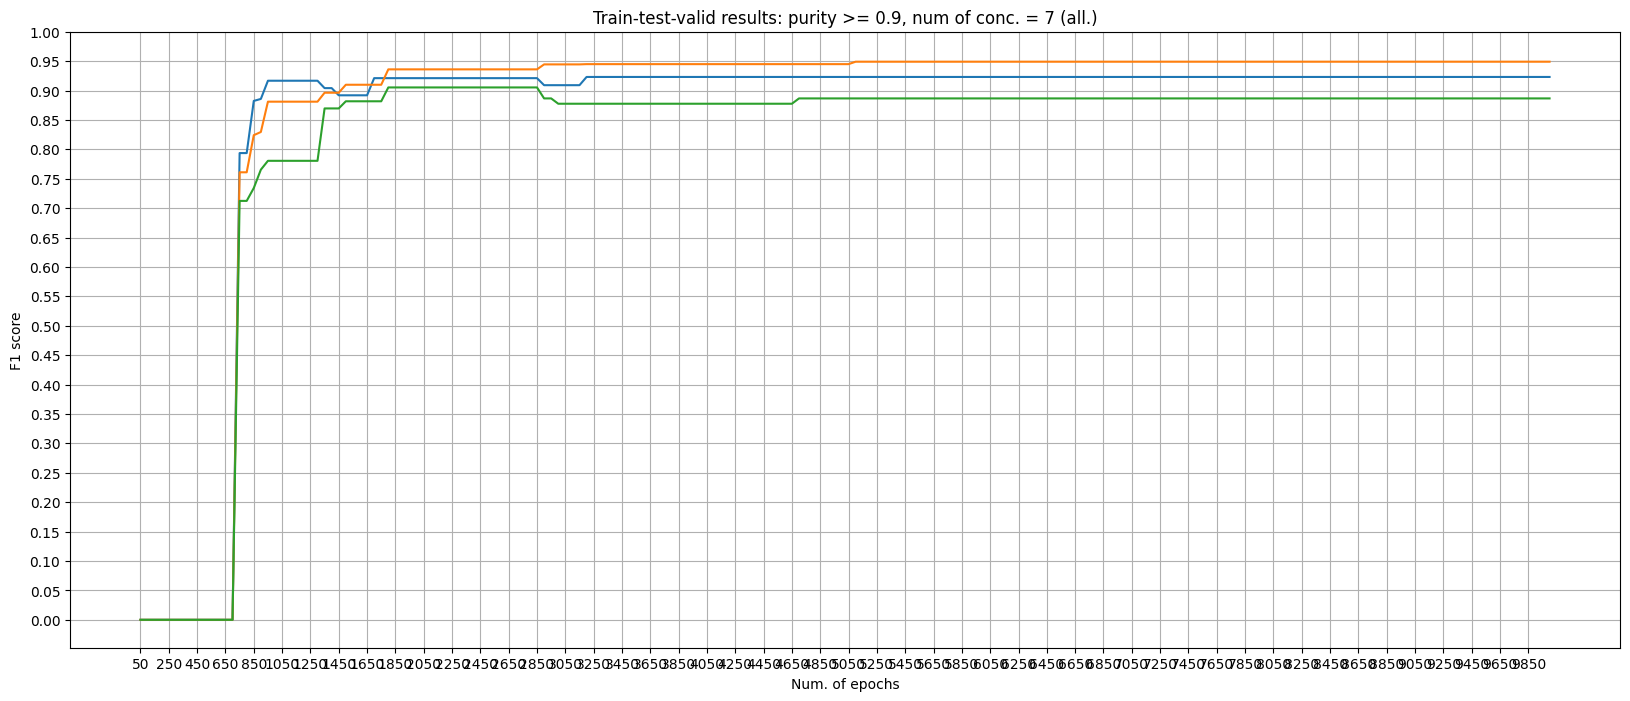

In [380]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,8))
plt.plot(epochs_list,f1_list )
plt.plot(epochs_list,f1_list_train)
plt.plot(epochs_list, f1_list_valid)
plt.xlabel("Num. of epochs")
plt.ylabel("F1 score")
plt.grid()
plt.xticks(np.arange(50, 10050, 200))
plt.yticks(np.arange(0, 1.05, 0.05))

In [378]:
res_09_all_bcw[res_09_all_bcw['epoch']== 1850]

NameError: name 'res_085_all_bcw' is not defined

In [2]:
### On best epoch perform repeating experiment, find F1-score average

In [384]:
import neural_lib58 as nl
import matplotlib as plt

f1_list = []
#f1_list_train = []
#f1_list_valid = []
#epochs_list = []

#res_90_all = pd.DataFrame(columns = ['epoch', 'F1_score_train', 'F1_score_val', 'F1_score_test'])
for i in range (0,100):
    print(i)
    #cn = nl.ConceptNetwork.from_lattice(L_, L_ind_, sorted(set(y_train_))) 
    #cn = nl.ConceptNetwork.from_lattice(L_, L_ind_2, sorted(set(y_train_))) 
   # L_ind_3
    cn = nl.ConceptNetwork.from_lattice(L_, L_ind_09, sorted(set(y_train_))) 
    #L_ind_used_prior[10]
    #cn = nl.ConceptNetwork.from_lattice(L_, L_ind_used_prior[6], sorted(set(y_train_))) 
    #cn = nl.ConceptNetwork.from_lattice(L_, L_ind_used_prior[23], sorted(set(y_train_)))
    #cn_ = nl.ConceptNetwork.from_lattice(L_,L_ind_used_prior[1], sorted(set(y_train_)))
#cn_ = nl.ConceptNetwork.from_lattice(L_, L_indices_, sorted(set(y_train_)))
    for i in range(37):
        k = 50
        #print('Epoch ', k*(i+1))
        epochs_list.append(k*(i+1))
        if i == 0:
            cn.fit(X_train_, y_train_, k)
        else:
            cn.fit_2(X_train_, y_train_, k)
    pred_all = cn.predict(X_test_)
   # pred_train_all = cn.predict(X_train_)
    #pred_val_all = cn.predict(X_valid)
    #pred_valid = pred_val_all[1]
    pred = pred_all[1]
    #pred_train = pred_train_all[1]
    

   # print('score train:', f1_score(y_train_, pred_train))
    #print('score val:', f1_score(y_valid, pred_valid))
    print('score test:', f1_score(y_test_, pred))
    f1_list.append(f1_score(y_test_, pred))
    #f1_list_train.append(f1_score(y_train_, pred_train))
    #f1_list_valid.append(f1_score(y_valid, pred_valid))
    #res_90_all.loc[len(res_90_all)] = [k*(i+1), f1_score(y_train_, pred_train), f1_score(y_valid, pred_valid), f1_score(y_test_, pred)]

print('Test F1 score', sum(f1_list)/100)


0
score test: 0.9142857142857143
1
score test: 0.8823529411764706
2
score test: 0.9295774647887324
3
score test: 0.9142857142857143
4
score test: 0.9166666666666666
5
score test: 0.9142857142857143
6
score test: 0.9142857142857143
7
score test: 0.9142857142857143
8
score test: 0.9142857142857143
9
score test: 0.9166666666666666
10
score test: 0.9142857142857143
11
score test: 0.7936507936507936
12
score test: 0.9166666666666666
13
score test: 0.9295774647887324
14
score test: 0.9041095890410958
15
score test: 0.9166666666666666
16
score test: 0.8695652173913043
17
score test: 0.9014084507042254
18
score test: 0.9166666666666666
19
score test: 0.9014084507042254
20
score test: 0.9295774647887324
21
score test: 0.8823529411764706
22
score test: 0.9142857142857143
23
score test: 0.9142857142857143
24
score test: 0.9142857142857143
25
score test: 0.9166666666666666
26
score test: 0.9166666666666666
27
score test: 0.8857142857142857
28
score test: 0.8484848484848485
29
score test: 0.9166666

### 2. Let's try all concepts from this interval:  (purity > 0.85)

#### 1) They cover:

In [390]:
pur_085 = 0.85

In [391]:
union_coverage_obj = set((pur_conc_all_one_sided[pur_085][0][0].extent))
for conc in pur_conc_all_one_sided[pur_085]:
    print(conc[2])
    union_coverage_obj = union_coverage_obj.union(set(conc[0].extent))
print(round(len(union_coverage_obj)/len(y_train_),2))
    

0.59
0.62
0.64
0.67
0.7
0.72
0.72
0.72
0.74
0.77


#### Checking the performance:


In [381]:
import neural_lib58 as nl
import matplotlib as plt

f1_list = []
f1_list_train = []
f1_list_valid = []
epochs_list = []

res_085_all_bcw = pd.DataFrame(columns = ['epoch', 'F1_score_train', 'F1_score_val', 'F1_score_test'])

cn = nl.ConceptNetwork.from_lattice(L_, L_ind_085, sorted(set(y_train_)))
#cn_ = nl.ConceptNetwork.from_lattice(L_, L_indices_, sorted(set(y_train_)))
for i in range(200):
    k = 50
    print('Epoch ', k*(i+1))
    epochs_list.append(k*(i+1))
    if i == 0:
        cn.fit(X_train_, y_train_, k)
    else:
        cn.fit_2(X_train_, y_train_, k)
    pred_all = cn.predict(X_test_)
    pred_train_all = cn.predict(X_train_)
    pred_val_all = cn.predict(X_valid)
    pred_valid = pred_val_all[1]
    pred = pred_all[1]
    pred_train = pred_train_all[1]
    

    print('score train:', f1_score(y_train_, pred_train))
    print('score val:', f1_score(y_valid, pred_valid))
    print('score test:', f1_score(y_test_, pred))
    f1_list.append(f1_score(y_test_, pred))
    f1_list_train.append(f1_score(y_train_, pred_train))
    f1_list_valid.append(f1_score(y_valid, pred_valid))
    res_085_all_bcw.loc[len(res_085_all_bcw)] = [k*(i+1), f1_score(y_train_, pred_train), f1_score(y_valid, pred_valid), f1_score(y_test_, pred)]

    


Epoch  50
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  100
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  150
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  200
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  250
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  300
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  350
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  400
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  450
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  500
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  550
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  600
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  650
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  700
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  750
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  800
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  850
score train: 0.0
score val: 0.0
score test: 0.

In [ ]:
res_09_all_bcw.to_csv('res_09_all_bcw.csv')
res_085_all_bcw.to_csv('res_085_all_bcw.csv')

In [382]:
res_085_all_bcw[res_085_all_bcw['epoch']==1850]

,epoch,F1_score_train,F1_score_val,F1_score_test
36,1850.0,0.881057,0.765432,0.914286


([<matplotlib.axis.YTick at 0x142d0d910>,
 [Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.15000000000000002, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.30000000000000004, '0.30'),
  Text(0, 0.35000000000000003, '0.35'),
  Text(0, 0.4, '0.40'),
  Text(0, 0.45, '0.45'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.55, '0.55'),
  Text(0, 0.6000000000000001, '0.60'),
  Text(0, 0.65, '0.65'),
  Text(0, 0.7000000000000001, '0.70'),
  Text(0, 0.75, '0.75'),
  Text(0, 0.8, '0.80'),
  Text(0, 0.8500000000000001, '0.85'),
  Text(0, 0.9, '0.90'),
  Text(0, 0.9500000000000001, '0.95'),
  Text(0, 1.0, '1.00')])

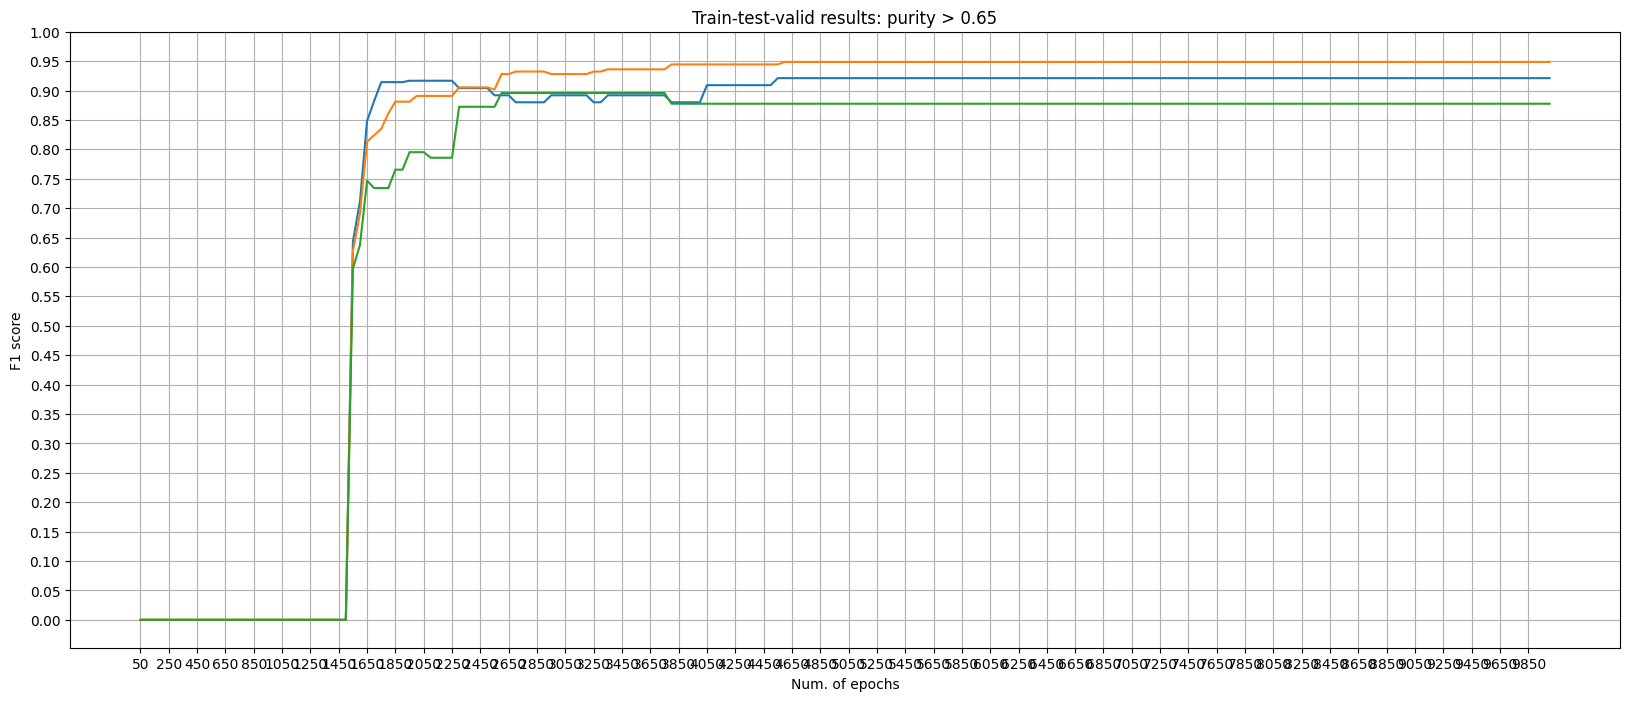

In [383]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,8))
plt.plot(epochs_list,f1_list )
plt.plot(epochs_list,f1_list_train)
plt.plot(epochs_list, f1_list_valid)
plt.xlabel("Num. of epochs")
plt.ylabel("F1 score")
plt.grid()
plt.xticks(np.arange(50, 10050, 200))
plt.yticks(np.arange(0, 1.05, 0.05))

In [ ]:
vis = LineVizNx(node_label_font_size=14, node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n')
edge_weights = cn.edge_weights_from_network()

In [ ]:
descr = {'Synfuels', 'Physician', 'Duty-free', 'Missile', 'Nicaragua', 'Budget'}

traced = cn.trace_description(descr, include_targets=False)

In [ ]:
import networkx as nx

fig, ax = plt.subplots(figsize=(20,10))

vis.draw_poset(
    cn.poset, ax=ax, 
    flg_node_indices=False,
    node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
    node_color=['darkblue' if el_i in traced else 'lightgray' for el_i in range(len(cn.poset))],
    edge_color=[edge_weights[edge] for edge in cn.poset.to_networkx().edges],
    edge_cmap=plt.cm.RdBu,
)
nx.draw_networkx_edge_labels(cn.poset.to_networkx(), vis.mover.pos, {k: f"{v:.1f}" for k,v in edge_weights.items()}, label_pos=0.7)

plt.title('Neural network with fitted edge weights', size=24, x=0.05, loc='left')
plt.tight_layout()
plt.subplots_adjust()
#plt.savefig('fitted_network.png')
plt.show()

#### Choosing 2 concepts with maximal union coverage with purity above 0.9

#### Counting concept coverage one-by-one

In [394]:
n = 2
pur_ = 0.9
sorted_cov = sorted(cov_conc_one_sided[pur_])

t = count_pur_one_sided[pur_]


conc_list_ = {}
L_ind_used_prior = {}
full_list_ind = {}

# i -> priority
for i in range(1,t+1):
    for c in pur_conc_all_one_sided[pur_]:
        if c[2] == sorted_cov[-i]:
            first_c = c
            break

    list_param = []
    conc_prior = []
    max_cov = set(first_c[0].extent)
    chosen = first_c
  #  print(len(max_cov))

    for conc in pur_conc_all_one_sided[pur_]:
        if len(max_cov) < len(set(first_c[0].extent).union(set(conc[0].extent))):
          #  print(len(set(conc[0].extent)))
            cover_un = round(len(set(first_c[0].extent).union(set(conc[0].extent)))/len(y_train_),2)
            print(cover_un)
            max_cov = set(first_c[0].extent).union(set(conc[0].extent))
            chosen = conc
 #   print(len(max_cov), chosen[1], chosen[2])


    conc_prior.append(first_c)
    conc_prior.append(chosen)
    list_param.append(conc_prior)
    list_param.append(cover_un)
    conc_list_[i] = list_param
   # print(conc_list_)

    L_ind_used_prior[i] = []
    full_list_ind[i] = [] 
    full_list_ind[i].append(cover_un)
    for c in conc_prior:
        L_ind_used_prior[i].append(L_.index(c[0]))
    full_list_ind[i].append( L_ind_used_prior[i])
print(full_list_ind)

0.67
0.72
0.72
0.72
{1: [0.72, [4, 3]], 2: [0.72, [3, 2]], 3: [0.72, [2, 3]]}


### 3 concepts with purity above 0.85

In [426]:
n = 3
pur_ = 0.85
sorted_cov = sorted(cov_conc_one_sided[pur_])

t = count_pur_one_sided[pur_]


conc_list_ = {}
L_ind_used_prior = {}
full_list_ind = {}

# i -> priority
for i in range(1,t+1):
    for c in pur_conc_all_one_sided[pur_]:
        if c[2] == sorted_cov[-i]:
            first_c = c
            break

    list_param = []
    conc_prior = []
    max_cov = set(first_c[0].extent)
    chosen1 = first_c
  #  print(len(max_cov))

    for conc in pur_conc_all_one_sided[pur_]:
        if len(max_cov) < len(set(first_c[0].extent).union(set(conc[0].extent))):
          #  print(len(set(conc[0].extent)))
            cover_un1 = round(len(set(first_c[0].extent).union(set(conc[0].extent)))/len(y_train_),2)
            print(cover_un1)
            max_cov = set(first_c[0].extent).union(set(conc[0].extent))
            chosen1 = conc
    max_cov2 = max_cov
            
            
 #   print(len(max_cov), chosen[1], chosen[2])


    conc_prior.append(first_c)
    conc_prior.append(chosen1)

    for conc in pur_conc_all_one_sided[pur_]:
        if len(max_cov2) <=len(max_cov.union(set(conc[0].extent))):
          #  print(len(set(conc[0].extent)))
            cover_un2 = round(len((max_cov).union(set(conc[0].extent)))/len(y_train_),2)
            #print(cover_un2)
            max_cov2 = max_cov.union(set(conc[0].extent))
            chosen2 = conc
    conc_prior.append(chosen2)
        
        
    list_param.append(conc_prior)
    list_param.append(cover_un2)
    conc_list_[i] = list_param
   # print(conc_list_)

    L_ind_used_prior[i] = []
    full_list_ind[i] = [] 
    full_list_ind[i].append(cover_un2)
    for c in conc_prior:
        L_ind_used_prior[i].append(L_.index(c[0]))
    full_list_ind[i].append( L_ind_used_prior[i])
print(full_list_ind)

0.77
0.74
0.75
0.74
0.75
0.74
0.75
0.75
0.77
0.77
0.74
0.77
0.77
0.67
0.72
0.75
0.75
0.72
0.74
0.72
0.75
0.76
{1: [0.77, [12, 6, 12]], 2: [0.77, [7, 6, 12]], 3: [0.77, [7, 6, 12]], 4: [0.77, [7, 6, 12]], 5: [0.77, [6, 12, 12]], 6: [0.77, [5, 8, 12]], 7: [0.77, [4, 8, 12]], 8: [0.77, [3, 5, 8]], 9: [0.77, [2, 8, 12]]}


## 2 concepts with purity > 0.85

In [406]:
n = 2
pur_3 = 0.85
sorted_cov = sorted(cov_conc_one_sided[pur_3])

t = count_pur_one_sided[pur_3]


conc_list_ = {}
L_ind_used_prior = {}
full_list_ind = {}

# i -> priority
for i in range(1,t+1):
    for c in pur_conc_all_one_sided[pur_3]:
        if c[2] == sorted_cov[-i]:
            #print('lala', sorted_cov[-i])
            #print('fc',L_.index(first_c[0]))
            first_c = c
            break

    list_param = []
    conc_prior = []
    max_cov = set(first_c[0].extent)
    chosen = first_c
  #  print(len(max_cov))

    for conc in pur_conc_all_one_sided[pur_3]:
        if len(max_cov) < len(set(first_c[0].extent).union(set(conc[0].extent))):
          #  print(len(set(conc[0].extent)))
            cover_un = round(len(set(first_c[0].extent).union(set(conc[0].extent)))/len(y_train_),2)
            #print(cover_un)
            max_cov = set(first_c[0].extent).union(set(conc[0].extent))
            chosen = conc
 #   print(len(max_cov), chosen[1], chosen[2])


    conc_prior.append(first_c)
    conc_prior.append(chosen)
    list_param.append(conc_prior)
    list_param.append(cover_un)
    conc_list_[i] = list_param
    #print(conc_list_)

    L_ind_used_prior[i] = []
    full_list_ind[i] = [] 
    full_list_ind[i].append(cover_un)
    for c in conc_prior:
        L_ind_used_prior[i].append(L_.index(c[0]))
    full_list_ind[i].append( L_ind_used_prior[i])
print(full_list_ind)

{1: [0.77, [12, 6]], 2: [0.75, [7, 6]], 3: [0.75, [7, 6]], 4: [0.75, [7, 6]], 5: [0.77, [6, 12]], 6: [0.77, [5, 8]], 7: [0.75, [4, 8]], 8: [0.74, [3, 5]], 9: [0.76, [2, 8]]}


### > 0.85

In [430]:
import neural_lib58 as nl
import matplotlib as plt
coverage_i = full_list_ind[2][0]
f1_list_ = []
f1_list_train_ = []
f1_list_valid_ = []
epochs_list_ = []

res_85_1_2_bcw= pd.DataFrame(columns = ['cov', 'epoch', 'F1_score_train', 'F1_score_val', 'F1_score_test'])

cn_ = nl.ConceptNetwork.from_lattice(L_,L_ind_used_prior[2], sorted(set(y_train_)))
#cn_ = nl.ConceptNetwork.from_lattice(L_, L_indices_, sorted(set(y_train_)))
for i in range(200):
    k = 50
    print('Epoch ', k*(i+1))
    epochs_list_.append(k*(i+1))
    if i == 0:
        cn_.fit(X_train_, y_train_, k)
    else:
        cn_.fit_2(X_train_, y_train_, k)
    pred_all_ = cn_.predict(X_test_)
    pred_train_all_ = cn_.predict(X_train_)
    pred_val_all_ = cn_.predict(X_valid)
    pred_valid_ = pred_val_all_[1]
    pred_ = pred_all_[1]
    pred_train_ = pred_train_all_[1]
    

    print('score train:', f1_score(y_train_, pred_train_))
    print('score val:', f1_score(y_valid, pred_valid_))
    print('score test:', f1_score(y_test_, pred_))
    f1_list_.append(f1_score(y_test_, pred_))
    f1_list_train_.append(f1_score(y_train_, pred_train_))
    f1_list_valid_.append(f1_score(y_valid, pred_valid_))
    res_85_1_2_bcw.loc[len(res_85_1_2_bcw)] = [coverage_i, k*(i+1), f1_score(y_train_, pred_train_), f1_score(y_valid, pred_valid_), f1_score(y_test_, pred_)]

    


Epoch  50
score train: 0.5427350427350427
score val: 0.5838509316770186
score test: 0.5
Epoch  100
score train: 0.5427350427350427
score val: 0.5838509316770186
score test: 0.5
Epoch  150
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  200
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  250
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  300
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  350
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  400
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  450
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  500
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  550
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  600
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  650
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  700
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  750
score train: 0.0
score val: 0.0
score test: 0.0
Epoch  800
score train: 0.0
score val: 0.0
score test: 0

In [399]:
res_85_1_2_bcw[res_90_1_2_bcw['epoch']==1500]

,cov,epoch,F1_score_train,F1_score_val,F1_score_test
29,0.72,1500.0,0.931727,0.893617,0.891892


In [4]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(25,8))
plt.plot(epochs_list_,f1_list_ )
plt.plot(epochs_list_,f1_list_train_)
plt.plot(epochs_list_, f1_list_valid_)

plt.xlabel("Num. of epochs")
plt.ylabel("F1 score")
plt.grid()
plt.xticks(np.arange(50, 10050, 200))
plt.yticks(np.arange(0, 1.05, 0.05))

NameError: name 'epochs_list_' is not defined

<Figure size 2500x800 with 0 Axes>

## Test Check

# TESTING !!!!

In [444]:
import neural_lib58 as nl
import matplotlib as plt

f1_list = []
#f1_list_train = []
#f1_list_valid = []
#epochs_list = []

#res_90_all = pd.DataFrame(columns = ['epoch', 'F1_score_train', 'F1_score_val', 'F1_score_test'])
for i in range (0,100):
    print(i)
    #cn = nl.ConceptNetwork.from_lattice(L_, L_ind_, sorted(set(y_train_))) 
    #cn = nl.ConceptNetwork.from_lattice(L_, L_ind_2, sorted(set(y_train_))) 
   # L_ind_3
    #cn = nl.ConceptNetwork.from_lattice(L_, L_ind_3, sorted(set(y_train_))) 
    #L_ind_used_prior[10]
    cn = nl.ConceptNetwork.from_lattice(L_, L_ind_used_prior[9], sorted(set(y_train_))) 
    #cn = nl.ConceptNetwork.from_lattice(L_, L_ind_used_prior[23], sorted(set(y_train_)))
    #cn_ = nl.ConceptNetwork.from_lattice(L_,L_ind_used_prior[1], sorted(set(y_train_)))
#cn_ = nl.ConceptNetwork.from_lattice(L_, L_indices_, sorted(set(y_train_)))
    for i in range(40):
        k = 50
        #print('Epoch ', k*(i+1))
        epochs_list.append(k*(i+1))
        if i == 0:
            cn.fit(X_train_, y_train_, k)
        else:
            cn.fit_2(X_train_, y_train_, k)
    pred_all = cn.predict(X_test_)
   # pred_train_all = cn.predict(X_train_)
    #pred_val_all = cn.predict(X_valid)
    #pred_valid = pred_val_all[1]
    pred = pred_all[1]
    #pred_train = pred_train_all[1]
    

   # print('score train:', f1_score(y_train_, pred_train))
    #print('score val:', f1_score(y_valid, pred_valid))
    print('score test:', f1_score(y_test_, pred))
    f1_list.append(f1_score(y_test_, pred))
    #f1_list_train.append(f1_score(y_train_, pred_train))
    #f1_list_valid.append(f1_score(y_valid, pred_valid))
    #res_90_all.loc[len(res_90_all)] = [k*(i+1), f1_score(y_train_, pred_train), f1_score(y_valid, pred_valid), f1_score(y_test_, pred)]

print('Test F1 score', sum(f1_list)/100)


0
score test: 0.9014084507042254
1
score test: 0.9142857142857143
2
score test: 0.9014084507042254
3
score test: 0.8767123287671232
4
score test: 0.8888888888888888
5
score test: 0.9142857142857143
6
score test: 0.9014084507042254
7
score test: 0.8888888888888888
8
score test: 0.9014084507042254
9
score test: 0.8888888888888888
10
score test: 0.9014084507042254
11
score test: 0.8888888888888888
12
score test: 0.9014084507042254
13
score test: 0.9014084507042254
14
score test: 0.8767123287671232
15
score test: 0.8767123287671232
16
score test: 0.9014084507042254
17
score test: 0.9166666666666666
18
score test: 0.8767123287671232
19
score test: 0.8767123287671232
20
score test: 0.8767123287671232
21
score test: 0.9166666666666666
22
score test: 0.8888888888888888
23
score test: 0.8888888888888888
24
score test: 0.8767123287671232
25
score test: 0.8767123287671232
26
score test: 0.8888888888888888
27
score test: 0.9041095890410958
28
score test: 0.8888888888888888
29
score test: 0.9166666

In [435]:
f1_scores_counts = pd.DataFrame(columns = ['intent', 'object coverage','F1 test'])

In [436]:
# f1_scores_counts.drop(0,axis=0,inplace=True)
# f1_scores_counts

In [437]:
#f1_scores_counts = pd.DataFrame(columns = ['object coverage','F1 test'])
f1_scores_counts.loc[0] = [[ L_[7].intent, L_[6].intent, L_[12].intent], full_list_ind[2][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(concavity_mean <= 0.093, area_se <= 31.285),...",0.77,0.911


In [439]:
f1_scores_counts.loc[1] = [[L_[5].intent, L_[8].intent,  L_[12].intent], full_list_ind[6][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(concavity_mean <= 0.093, area_se <= 31.285),...",0.77,0.911
1,"[(concavity_mean <= 0.093, concavity_worst <= ...",0.77,0.886


In [441]:
f1_scores_counts.loc[2] = [[L_[4].intent, L_[8].intent,  L_[12].intent], full_list_ind[7][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(concavity_mean <= 0.093, area_se <= 31.285),...",0.77,0.911
1,"[(concavity_mean <= 0.093, concavity_worst <= ...",0.77,0.886
2,"[(concavity_mean <= 0.093,), (area_mean <= 696...",0.77,0.891


In [443]:
f1_scores_counts.loc[3] = [[L_[3].intent, L_[5].intent, L_[8].intent], full_list_ind[8][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(concavity_mean <= 0.093, area_se <= 31.285),...",0.77,0.911
1,"[(concavity_mean <= 0.093, concavity_worst <= ...",0.77,0.886
2,"[(concavity_mean <= 0.093,), (area_mean <= 696...",0.77,0.891
3,"[(area_se <= 31.285,), (concavity_mean <= 0.09...",0.77,0.912


In [ ]:
f1_scores_counts.drop(4,axis=0,inplace=True)
f1_scores_counts

In [ ]:
f1_scores_counts.drop(3,axis=0,inplace=True)
# f1_scores_counts

In [446]:
f1_scores_counts.to_csv('bcw85_3.csv')

In [445]:
f1_scores_counts.loc[4] = [[L_[2].intent, L_[8].intent,  L_[12].intent], full_list_ind[9][0],round(sum(f1_list)/100,3)]
f1_scores_counts

,intent,object coverage,F1 test
0,"[(concavity_mean <= 0.093, area_se <= 31.285),...",0.77,0.911
1,"[(concavity_mean <= 0.093, concavity_worst <= ...",0.77,0.886
2,"[(concavity_mean <= 0.093,), (area_mean <= 696...",0.77,0.891
3,"[(area_se <= 31.285,), (concavity_mean <= 0.09...",0.77,0.912
4,"[(concavity_worst <= 0.26,), (area_mean <= 696...",0.77,0.892


In [425]:
f1_scores_counts.to_csv('bcw_85_2.csv')